In [26]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import io

In [28]:
s3_client = boto3.client('s3')
rekognition_client = boto3.client('rekognition')

In [30]:
bucket_name = "imagerepository-25-sept-2024"
image_path = "./cat.jpeg"
s3_object_name = "cat.jpeg"

In [32]:
#upload image to s3 bucket
s3_client.upload_file(image_path, bucket_name, s3_object_name)
print("Uploaded file to bucket!")

Uploaded file to bucket!


In [34]:
# call Rekognition to detect labels in the uploaded image
response = rekognition_client.detect_labels(
    Image={
        'S3Object': {
            'Bucket': bucket_name,
            'Name': s3_object_name
        }
    },
    MaxLabels=10,  # Maximum number of labels to return
    MinConfidence=75  # Minimum confidence level for the labels
)

# Print the detected labels
print("Detected labels:")
for label in response['Labels']:
    print(f"{label['Name']} : {label['Confidence']:.2f}%")

Detected labels:
Abyssinian : 99.54%
Animal : 99.54%
Cat : 99.54%
Mammal : 99.54%
Pet : 99.54%
Manx : 88.80%


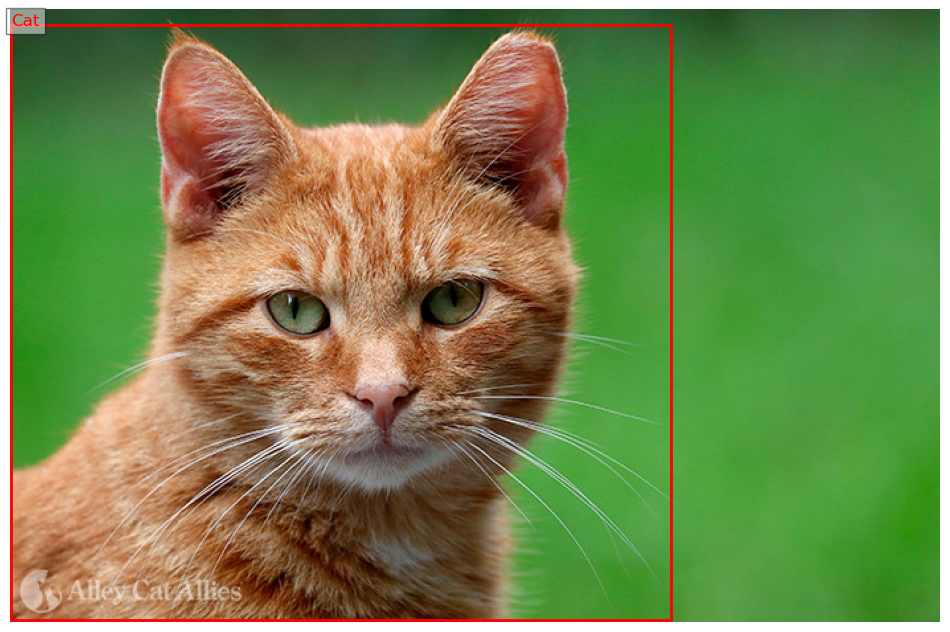

In [36]:
# Get the image from S3 to draw on it
s3 = boto3.client('s3')
image_obj = s3.get_object(Bucket=bucket_name, Key=s3_object_name)
image_data = image_obj['Body'].read()
image = Image.open(io.BytesIO(image_data))

# Create a figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Process the detected labels and draw bounding boxes
for label in response['Labels']:
    # Check if bounding box is available for the label
    if 'Instances' in label and label['Instances']:
        for instance in label['Instances']:
            box = instance['BoundingBox']
            # Calculate the bounding box coordinates
            left = box['Left'] * image.width
            top = box['Top'] * image.height
            width = box['Width'] * image.width
            height = box['Height'] * image.height
            
            # Create a Rectangle patch
            rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Annotate the label
            ax.text(left, top, label['Name'], color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the image with bounding boxes and labels
plt.axis('off')  # Hide the axes
plt.show()
